In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
# import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline
print (1)

1


In [7]:
data = pd.read_csv('housing.csv')

In [8]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [9]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

In [10]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [12]:

# Success
print ('Boston housing dataset has {0} data points with {1} variables each'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each


In [13]:
data.shape

(489, 4)

In [20]:
#PRICE IS THING WE ARE TRYING TO PREDICT

minimum_price = prices.min()

maximum_price = prices.max()

mean_price = prices.mean()

median_price = prices.median()

std_price = prices.std(ddof=0)
#standard deviation

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print( "First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
First quartile of prices: $350,700.00
Second quartile of prices: $518,700.00
Interquartile (IQR) of prices: $168,000.00


In [30]:
features.columns

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

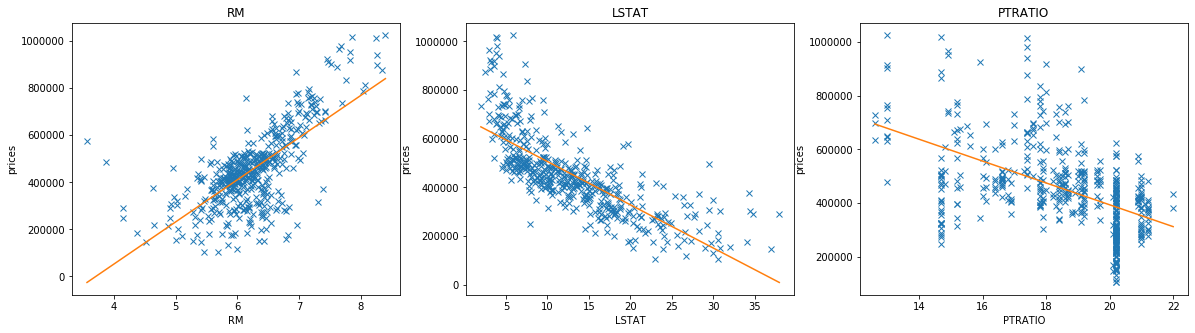

In [31]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'x')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [32]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

https://towardsdatascience.com/statistics-for-machine-learning-r-squared-explained-425ddfebf667

In [35]:

# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [38]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


In [45]:
# Check if split is actually correct
# We can see it's roughly 80% train and 20% train
# So we can proceed!
print(features.shape[0])
print(float(X_train.shape[0]) / float(features.shape[0]))
print(float(X_test.shape[0]) / float(features.shape[0]))

489
0.7995910020449898
0.20040899795501022


In [48]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

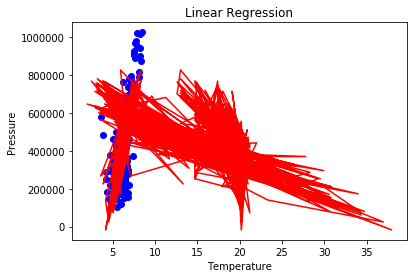

In [53]:
import matplotlib.pyplot as plt 
# Visualising the Linear Regression results 
plt.scatter(X_train['RM'], y_train, color = 'blue') 
  
plt.plot(X_train, lin.predict(X_train), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

In [56]:
y_train.head()

241     550200.0
367     184800.0
197    1018500.0
68      365400.0
324     443100.0
Name: MEDV, dtype: float64

In [58]:
X_train.head()

,RM,LSTAT,PTRATIO
241,6.718,6.56,19.1
367,4.368,30.63,20.2
197,7.853,3.81,14.7
68,5.594,13.09,18.9
324,6.037,8.01,20.2


In [60]:
lin.predict(X_train)-y_train

241      4811.310791
367   -104357.475391
197   -249551.869151
68      31225.726160
324     17597.034780
           ...      
320     95246.865870
15       4605.720235
484      1557.932330
125    -43203.025210
265    -36264.721800
Name: MEDV, Length: 391, dtype: float64